<a href="https://colab.research.google.com/github/SayaliMandhare/Capstone-Project-4-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/ML_Submission_capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Pranav Rajmane
##### **Team Member 2 - Pavan Malvay
##### **Team Member 3 - Sayali Mandhare
##### **Team Member 4 - Prathamesh kalambe

# **Project Summary -**

In this project of Zomato restaurant clustering and sentiment analysis focuses on customers and restaurants, we have analyzed the sentiments of the reviews given by the customer in the data and made some useful conclusions in the form of visualizations. Also, we tried to cluster the Zomato restaurants into different segments. The data was visualized in order to make it easy to analyze the data in the instant. The Analysis also solved some of the business cases that can directly help the customers find the best restaurant in their locality and for the company to grow up and work in the fields they are currently lagging in. This could help in clustering the restaurants into segments. The data also had valuable information about cuisine and cost which was used in cost vs. benefit analysis. The metadata of reviewers could also be used for identifying the critics in the industry.
The objective of this project is to group similar restaurants based on their attributes such as names of restaurants, cuisines, price range, ratings, reviews, etc. And to understand the overall customer satisfaction towards each restaurant. The information can be useful for Zomato to improve the user experience and make recommendations to customers based on their preferences and past experiences. 


# **GitHub Link -**

https://github.com/CoderPranavRaj/Zomato-Restaurant-Clustering-and-Sentiment-Analysis




# **Problem Statement**


The objective of this project is to gather and analyze data Zomato business to identify trends, inefficiencies, and areas for improvement. Through unsupervised machine learning analysis by grouping/clustering similar restaurants based on their attributes, we also aim to provide insights into customer behavior, cuisine popularity, and other key metrics that can inform strategic decision-making and drive growth in the business.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
Restaurant_df = pd.read_csv("/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv")
Reviews_df = pd.read_csv("/content/drive/MyDrive/Zomato Restaurant reviews.csv")

### Dataset First View

In [ ]:
# Dataset First Look
Restaurant_df.head(7)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM


In [ ]:
Reviews_df.head(7)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Restaurant_df.shape

(105, 6)

In [ ]:
Restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
Reviews_df.shape

(10000, 7)

In [ ]:
Reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
Restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Restaurant_df.duplicated().sum()

0

In [ ]:
Reviews_df.duplicated().sum()

36

In [ ]:
Reviews_df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
Reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [ ]:
#We will drop the null values as there are very few null values in ecah columns
Reviews_df.dropna(inplace=True)

In [ ]:
#Now Reviews dataset is completely clear
Reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

### What did you know about your dataset?

We have been provided with 2 data files, one contains restaurant data having 105 rows, 6 columns, - Name of the restaurant, URL link of restaurant, per person estimated cost of dining, Tagging of restaurants wrt Zomato categories, cuisines served by restaurant, restaurant timings, and the other dataset consists of review data having10000 rows, 7 columns - Name of reviewer, Review text, Ratings provided, Reviewer metadata- No. of reviews and followers, date and time of review, number of pictures posted with review.
In the restaurant data we have total of 54 missing values in the collection/category column and 1 missing in the timing column.
In the reviews data we have 2 missing reviewer names, 9 missing review, 2 missing ratings, 2 missing metadata, 2 missing time.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
Reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
Restaurant_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
Reviews_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,9955,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9955,7442,Ankita,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9955,10,5,3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9955,2477,1 Review,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9955,9775,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,9955.0,NaN,NaN,NaN,0.751984,2.575691,0.0,0.0,0.0,0.0,64.0


In [ ]:
#It is giving Nan values for mean,std,25%,etc beacause the datatype of the variables is object type which we will change to float in data wrangling part 

### Variables Description 

**Restaurant Data:**

**Name**- Name of Restaurants

**Links**- URL Links of Restaurants

**Cost**- Per person estimated cost of dining

**Collection**- Tagging of Restaurants with respect to Zomato categories

**Cuisines**- Cuisines served by restaurants

**Timings**- Restaurant timings


---


**Review Data:**

**Reviewer**- Name of the reviewer

**Review**- Review text

**Rating**- Rating provided

**MetaData**- Reviewer metadata- No of reviews and followers

**Time**- Date and Time of Review

**Pictures**- No of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
Reviews_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

In [ ]:
Reviews_df.Rating.unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
Reviews_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
#since there is only 1 like we will drop it
Reviews_df = Reviews_df[Reviews_df['Rating']!='Like']

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Making dataset analysis ready.
#Firstly we change the datatype of cost variable to integer in Restaurent dataset
Restaurant_df['Cost'] = Restaurant_df['Cost'].str.replace(",","").astype('int64')
#Then change datatypes of variables in Reviews dataset
Reviews_df['Rating'] = Reviews_df['Rating'].astype('float64')
Reviews_df['Reviews'],Reviews_df['Followers']=Reviews_df['Metadata'].str.split(',').str
Reviews_df['Reviews'] = pd.to_numeric(Reviews_df['Reviews'].str.split(' ').str[0])
Reviews_df['Followers'] = pd.to_numeric(Reviews_df['Followers'].str.split(' ').str[1])
Reviews_df['Time']=pd.to_datetime(Reviews_df['Time'])
Reviews_df['Year'] = pd.DatetimeIndex(Reviews_df['Time']).year
Reviews_df['Hour'] = pd.DatetimeIndex(Reviews_df['Time']).hour
Reviews_df = Reviews_df.drop(['Metadata'], axis =1)

<ipython-input-9-77e37eb06716>:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Reviews_df['Reviews'],Reviews_df['Followers']=Reviews_df['Metadata'].str.split(',').str


In [ ]:
#Dropping unneccesary cloumns from Resataurant df like Links and timings
Restaurant_df.drop(['Links','Timings'],axis = 1,inplace = True)

In [ ]:
#Changing null values from Restaurant df
Restaurant_df['Collections'] = Restaurant_df['Collections'].replace(np.nan , "Unknown", regex=True)

### What all manipulations have you done and insights you found?

Changed the data type of cost variable to integer in restaurant dataset, and in review dataset we changed rating to float64, then split the followers metadata to no. of followers and no. of reviews adjusted the date and time, then we dropped metadata column, also dropped unnecessary columns from restaurant like links and timing 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart- 1**

**EDA on Restaurants Data**




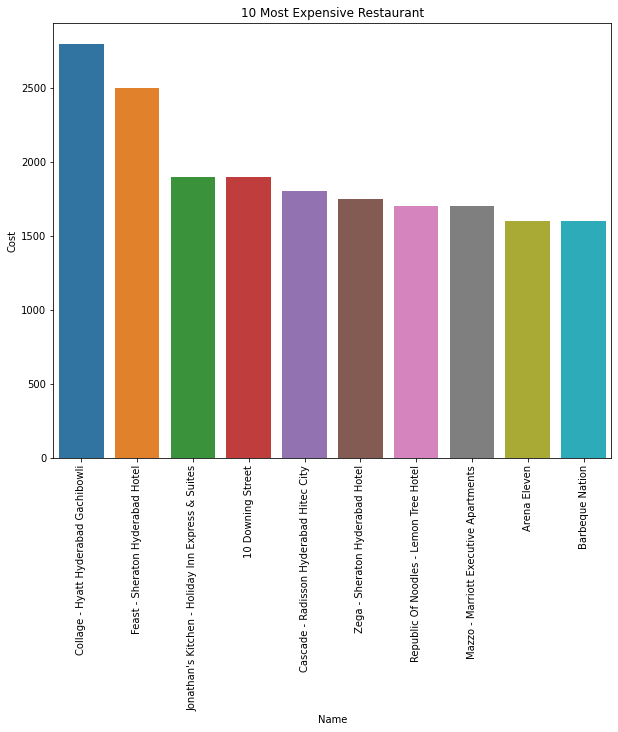

In [ ]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x='Name', y='Cost', data=Restaurant_df.sort_values(ascending=False, by='Cost')[:10] )
plt.title('10 Most Expensive Restaurant')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

The above bar chart shows cost comparison of top 10 most expensive restaurant

##### 2. What is/are the insight(s) found from the chart?

All the 10 restaurants are costing above 1500, with the top 2 being above 2500

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the bar chart, some insights that can be drawn are:

The top 10 most expensive restaurants have a high cost.
The top 2 restaurants have a significantly higher cost compared to the others.
The cost difference between the restaurants is noticeable, with a clear distinction between the top 2 and the rest.

#### Chart - 2

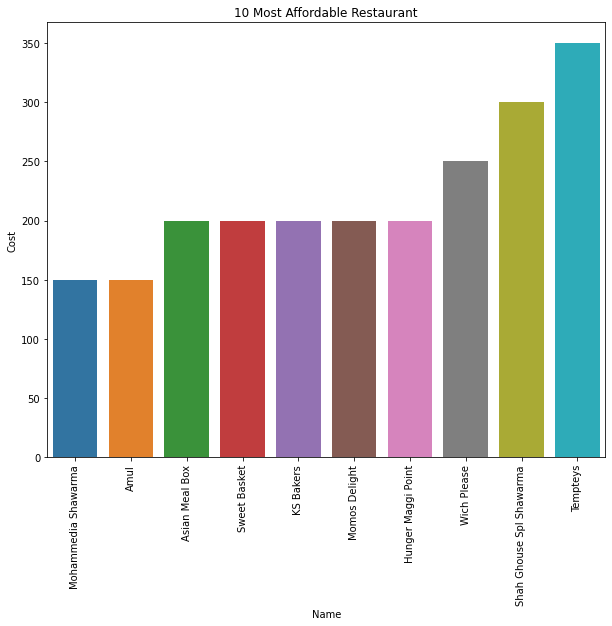

In [ ]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x='Name', y='Cost', data=Restaurant_df.sort_values(ascending=True, by='Cost')[:10] )
plt.title('10 Most Affordable Restaurant')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The above bar chart shows cost comparison of top 10 most affordable restaurant

##### 2. What is/are the insight(s) found from the chart?

All the 10 restaurants cost below 350, with the cheapest being less than 150

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the bar chart, some insights that can be drawn are:

The top 10 most affordable restaurants have a low cost.
The cheapest restaurant has a significantly lower cost compared to the others.
The cost difference between the restaurants is noticeable, with a clear distinction between the cheapest and the rest.

#### Chart - 3

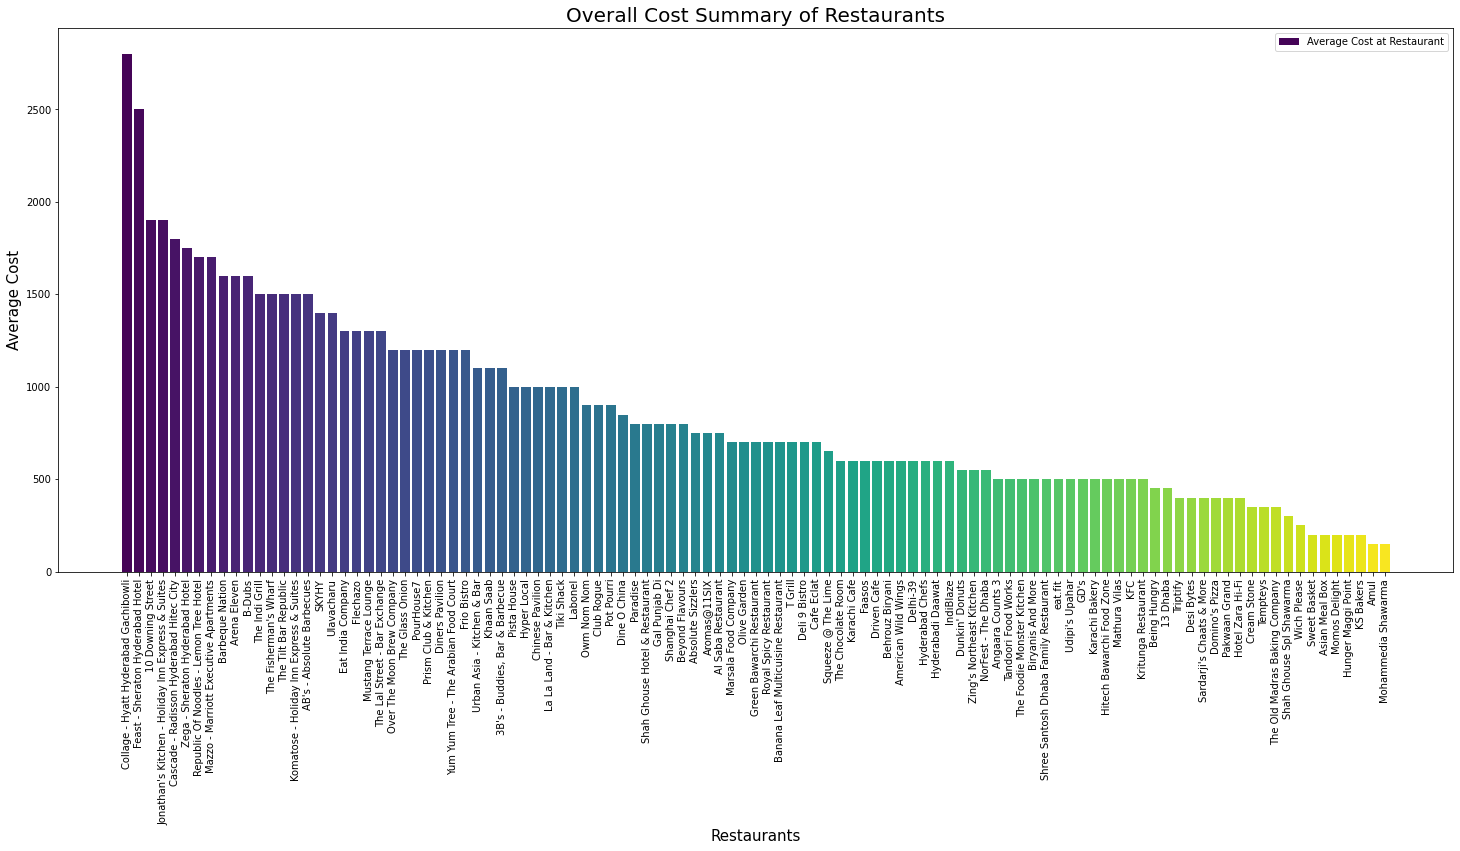

In [ ]:
# Chart - 3 visualization code

restaurants_cost=Restaurant_df.groupby('Name')['Cost'].mean().reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants',size=20)
plt.legend(['Average Cost at Restaurant'])

##### 1. Why did you pick the specific chart?

The above bar chart was picked to understand overall average cost comparison of 
all the restaurants

##### 2. What is/are the insight(s) found from the chart?

The top 2 expensive restaurants cost above 2500, while top 5 cost above 1500, the bottom 12 restaurants cost less than 500, while the cheapest 2 cost less than 150

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, some insights into the business impact of the cost of restaurants can be drawn as follows:

The top 2 expensive restaurants target high-end customers and offer high-quality dining experiences.
The top 5 restaurants have a relatively high cost compared to the bottom 12 restaurants and may also target high-end customers, but with a slightly lower price point.
The bottom 12 restaurants have a relatively low cost, making them accessible to a wider range of customers.
The cheapest 2 restaurants may attract budget-conscious customers and offer a more affordable dining experience.
For businesses looking to enter the food industry, focusing on the cost of their offerings is crucial in attracting a specific target customer.
Businesses offering more expensive dining experiences may need to differentiate their offerings and provide additional value to justify the higher cost.
Businesses offering more affordable dining experiences may need to balance quality and cost to attract customers.

#### Chart - 4

In [ ]:
# For loops to extract every single Cuisine name.
cuisine_list = Restaurant_df.Cuisines.str.split(', ') 
cuisines = []
for names in cuisine_list:
  for name in names:
    cuisines.append(name)
cuisine_series = pd.Series(cuisines)    

In [ ]:
# Creating DataFrame of Cuisines and their Counts.
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts().reset_index()
cuisine_df.rename(columns={0: 'Count'}, inplace=True)
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


Text(0.5, 1.0, 'Most popular cuisines at Restaurants')

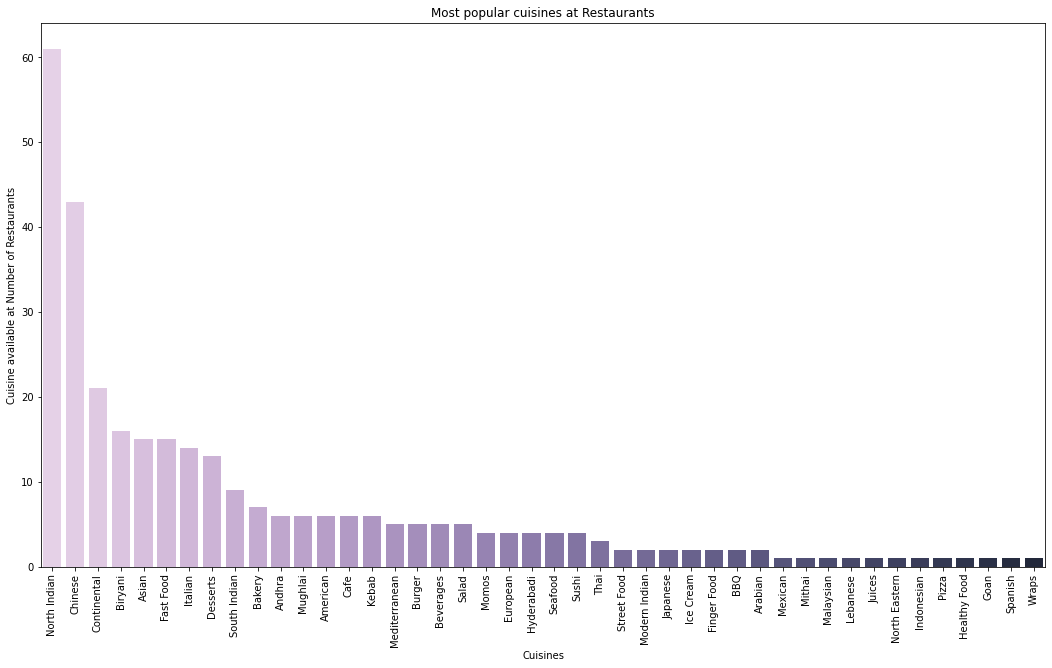

In [ ]:
# Plot of Cuisines in Resturants.
fig = plt.figure(figsize=[18,10])
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count',palette="ch:s=-.25,rot=.25")
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants')
     

##### 1. Why did you pick the specific chart?

The above bar chart was picked to understand overall comparison of most popular cuisines in restaurants

##### 2. What is/are the insight(s) found from the chart?

The top 5 popular cuisines are North Indian, Chinese, Continental, Biryani, Asian, while the least popular are Pizza, Healthy food, Goan Spanish and wraps 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, some insights into the business impact of popular cuisines can be drawn as follows:

The top 5 popular cuisines, North Indian, Chinese, Continental, Biryani, and Asian, have high demand and can provide a stable market for businesses offering these cuisines.
Restaurants offering the least popular cuisines, Pizza, Healthy food, Goan Spanish and wraps, may face lower demand and therefore face challenges in attracting customers.
For businesses looking to enter the food industry, focusing on the popular cuisines may be a good strategy to ensure a stable market and attract customers.
For businesses offering the least popular cuisines, they may need to innovate and differentiate their offerings to stand out in the market and attract customers.

#### Chart - 5

In [ ]:
#Visualizing distribution of cost across different cuisines

In [ ]:
# Creating a function for splitting our Cuisines and storing in list.
def cuisine_list(cuisines):
  
   
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines


In [ ]:
df = Restaurant_df.copy()

In [ ]:
# Applying our function on Cuisine column.
df['cuisines']=df['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
# Exploding Cuisine for getting seperate cuisine for each Resturants.
df=df.explode('cuisines')
df.head()

,Name,Cost,Collections,Cuisines,cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",European
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Kebab
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",North Indian
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",South Indian
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Continental


In [ ]:
df_1=df.groupby('cuisines').apply(lambda x:np.average(x['Cost'])).reset_index(name='AverageCost')
df_1 =df_1.sort_values(by='AverageCost',ascending=False)     

In [ ]:
df_1.head(10)

,cuisines,AverageCost
30,Modern Indian,2000.000000
22,Japanese,1700.000000
26,Malaysian,1700.000000
41,Sushi,1562.500000
4,BBQ,1550.000000
21,Italian,1532.142857
16,Goan,1500.000000
3,Asian,1460.000000
27,Mediterranean,1340.000000
11,Continental,1307.142857


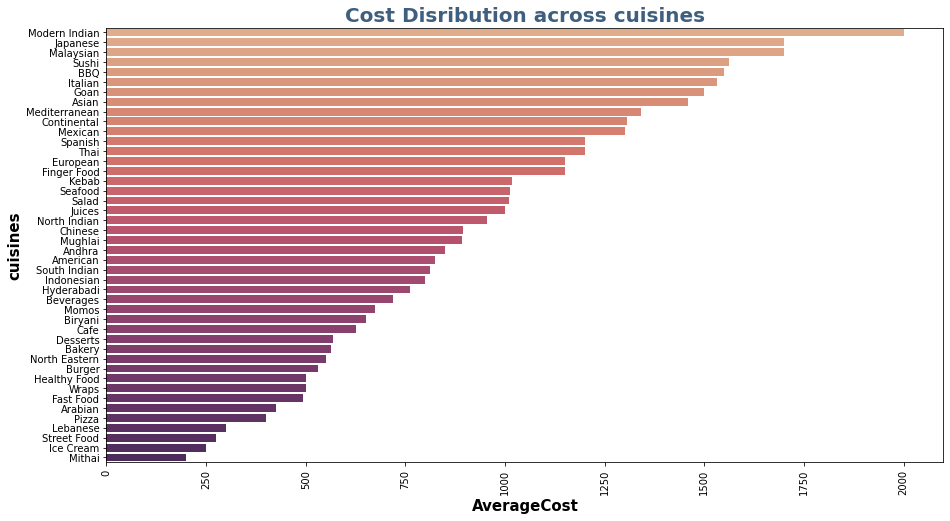

In [ ]:
# Average Cost of top Cusinies
plt.figure(figsize=(15,8))
x = df_1['AverageCost']
y = df_1['cuisines']
plt.title("Cost Disribution across cuisines",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisines",weight='bold',fontsize=15)
plt.xlabel("Average Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='flare')
plt.show()

##### 1. Why did you pick the specific chart?

The above bar chart was picked to understand cost distribution across cuisines

##### 2. What is/are the insight(s) found from the chart?

The top 5 expensive cuisines are modern Indian, Japanese, Malaysian, Sushi, BBQ. And the least expensive are Pizza, Lebanese, Street Food, Ice Cream, Mithai

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, some insights into creating a positive business impact with expensive cuisines can be drawn as follows:

The top 5 expensive cuisines, modern Indian, Japanese, Malaysian, Sushi, and BBQ, are premium offerings and may target high-end customers looking for unique and upscale dining experiences.
To create a positive business impact, restaurants offering expensive cuisines should focus on delivering high-quality food and exceptional service.
Differentiating their offerings from competitors and providing unique experiences can help attract and retain customers.
Marketing and promoting their offerings effectively can help increase awareness and attract customers interested in premium dining experiences.
Collaborating with influencers and food critics can help build reputation and attract more customers.
On the other hand, for the least expensive cuisines such as Pizza, Lebanese, Street Food, Ice Cream, and Mithai:

Offering good quality and value for money is crucial in attracting customers.
Focusing on delivering a memorable experience and creating a strong brand identity can help increase customer loyalty and repeat business.
Innovating and offering unique and creative menu options can help attract customers and stand out in the market.

#### Chart - 6

**EDA on Reviews data**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ratings')

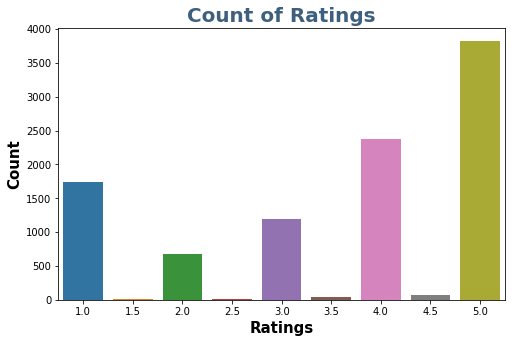

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
sns.countplot(Reviews_df.Rating)
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

##### 1. Why did you pick the specific chart?

The above bar chart was picked to understand count of ratings given to restaurants from 1-5


##### 2. What is/are the insight(s) found from the chart?

The ratings given are in range of 1 to 5, 5 being the highest, 4 second, 1 third, 3 fourth. 2 being the lowest rating, while ratings of 1.5, 2.5, 3.5, 4.5 have negligible count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, some insights into creating a positive business impact with ratings can be drawn as follows:

Ratings of 5 and 4 are considered high, indicating that customers are generally satisfied with their dining experiences.
To create a positive business impact, restaurants should aim to consistently receive high ratings from customers.
Focusing on delivering high-quality food, exceptional service, and a memorable dining experience can help increase customer satisfaction and improve ratings.
Addressing customer feedback and making improvements to the dining experience can help maintain high ratings and attract new customers.
Marketing and promoting high ratings and positive customer feedback can help build reputation and attract new customers.
On the other hand, low ratings of 2 and 1 indicate areas for improvement.

Restaurants receiving low ratings should focus on addressing the issues that led to the low ratings and making improvements to the dining experience.
Listening to customer feedback and making necessary changes can help improve ratings and increase customer satisfaction.

#### Chart - 7

Text(0.5, 1.0, 'Top Restaurants With High Ratings')

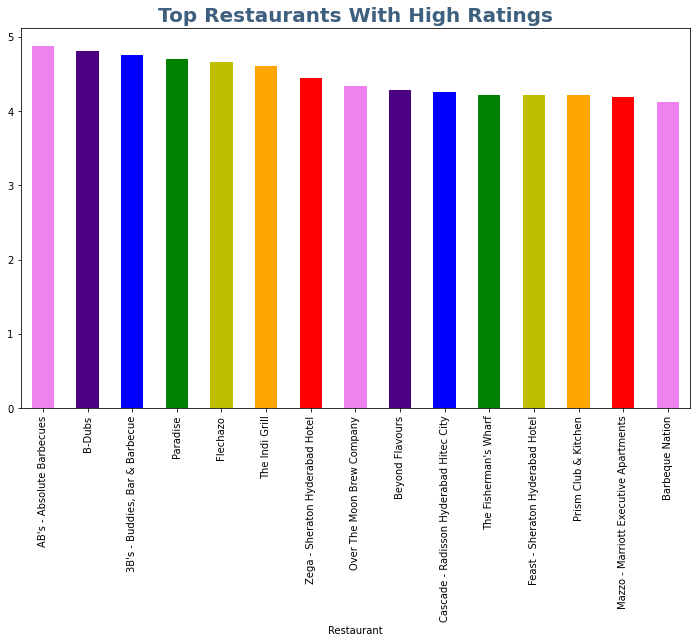

In [ ]:
# Chart - 7 visualization code
plt.rcParams['figure.figsize'] = (12, 7)
Reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).head(15).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title("Top Restaurants With High Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])


##### 1. Why did you pick the specific chart?

The above bar chart was picked to compare top 15 restaurants with highest ratings

##### 2. What is/are the insight(s) found from the chart?

The ratings given are in range of 1 to 5, the top 15 restaurants have ratings of 4.9 to 4.5, absolute barbecue, B-dubs, 3B’s have highest rating of above 4.5

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, some insights into creating a positive business impact with ratings can be drawn as follows:

The top 15 restaurants with ratings of 4.9 to 4.5 are considered high, indicating that customers are generally satisfied with their dining experiences.
Restaurants with the highest ratings, such as Absolute Barbecue, B-dubs, and 3B’s, have a strong reputation for providing a positive dining experience.
To create a positive business impact, restaurants should aim to consistently receive high ratings from customers.
Focusing on delivering high-quality food, exceptional service, and a memorable dining experience can help increase customer satisfaction and improve ratings.
Addressing customer feedback and making improvements to the dining experience can help maintain high ratings and attract new customers.
Marketing and promoting high ratings and positive customer feedback can help build reputation and attract new customers.

#### Chart - 8

Text(0.5, 1.0, 'Top Reviewers')

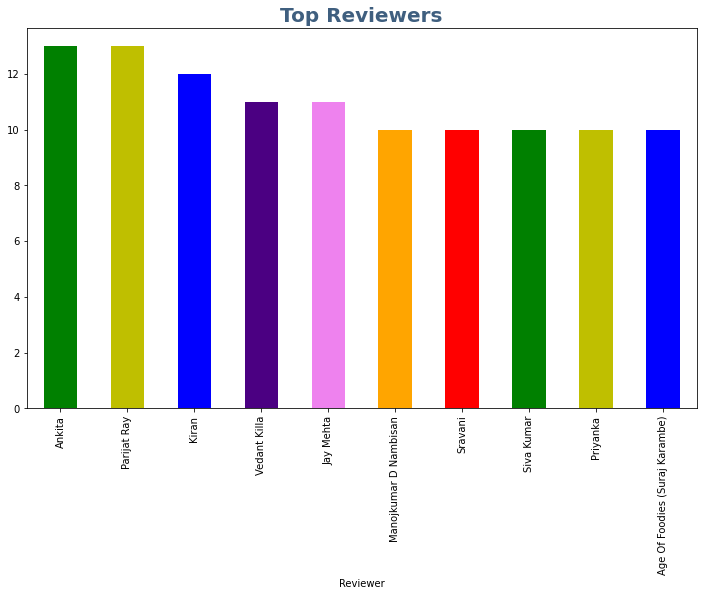

In [ ]:
# Chart - 8 visualization code
plt.rcParams['figure.figsize'] = (12, 7)
Reviews_df.groupby(['Reviewer'])['Rating'].count().sort_values(ascending=False).head(10).plot.bar(color = ['g','y','b','indigo','violet','orange','r'])
plt.title("Top Reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

##### 1. Why did you pick the specific chart?

The above bar chart was picked to compare top 10 reviewers with their number of reviews

##### 2. What is/are the insight(s) found from the chart?

The higher number of reviews is 13 by Ankita and Parijat, while the remaining 8 are between 10-12

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, the higher number of reviews (13 by Ankita and Parijat) and the remaining 8 between 10-12 can have both positive and negative business impacts.

Positive Business Impacts:

A higher number of reviews can indicate a strong customer base and higher levels of customer engagement.
A high volume of reviews can help build reputation and attract new customers.
More reviews can provide a wider range of feedback, which can help businesses identify areas for improvement and make positive changes to the customer experience.
Negative Business Impacts:

A higher number of negative reviews can have a negative impact on reputation and reduce customer confidence in the business.
A higher number of reviews can also draw attention to negative aspects of the business, such as poor service or low-quality food.
High numbers of negative reviews can result in loss of customers and reduced revenue.

#### Chart - 9

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Ratings Across different hours of the day')

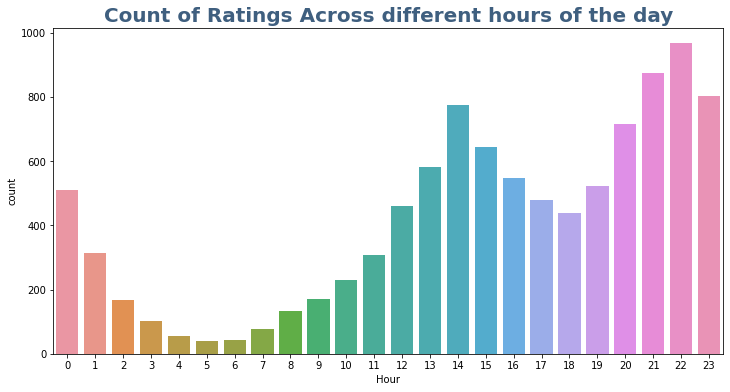

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
sns.countplot(Reviews_df.Hour)
plt.title("Count of Ratings Across different hours of the day",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

##### 1. Why did you pick the specific chart?

The above bar chart was picked to compare ratings given to restaurants across different hours of the day

##### 2. What is/are the insight(s) found from the chart?

The highest number of ratings were given between 21hrs to 23hrs the second highest was given between 13hrs to 15hrs, while 4hrs to 6hrs had the least

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the information provided, the highest number of ratings were given between 21hrs to 23hrs and the second highest was given between 13hrs to 15hrs, while 4hrs to 6hrs had the least, the following insights can be drawn for a positive business impact:

Knowing the peak times when customers are most active in giving ratings can help businesses adjust their operations to accommodate higher demand.
Businesses can plan their staffing and resource allocation accordingly to ensure a consistent level of customer service during peak hours.
Offering promotions, discounts or special deals during off-peak hours (4hrs to 6hrs) can help attract customers and increase revenue during slower periods.
Monitoring the number of ratings at different times can help businesses understand customer behavior and make informed decisions on when to increase or decrease staffing or marketing efforts.
Overall, understanding the timing of customer ratings can help businesses make data-driven decisions to improve customer experience and increase revenue.

#### Chart - 10

Text(0.5, 1.0, 'Top Food Critics in the industry')

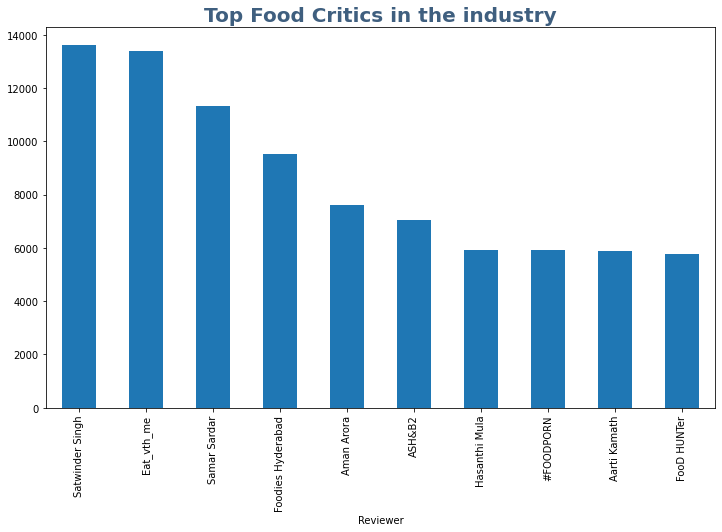

In [ ]:
# Chart - 10 visualization code
#Top Critics from metadata provided
Reviews_df['Critics_score'] = Reviews_df.Reviews + Reviews_df.Followers
Reviews_df.groupby(['Reviewer'])['Critics_score'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.title("Top Food Critics in the industry",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

In [ ]:
Critics_df = Reviews_df[['Reviewer','Critics_score']]

In [ ]:
Critics_df.dropna(inplace = True)

In [ ]:
Critics_df.drop_duplicates(inplace = True)

In [ ]:
Critics_df = Critics_df.sort_values(by = 'Critics_score',ascending = False)

In [ ]:
Critics_df.head(10).reset_index()

,index,Reviewer,Critics_score
0,6876,Satwinder Singh,13596.0
1,8719,Eat_vth_me,13380.0
2,5160,Samar Sardar,11337.0
3,8027,Foodies Hyderabad,9525.0
4,4650,Srinivas,7662.0
5,1071,Aman Arora,7619.0
6,1535,ASH&B2,7029.0
7,5581,Hasanthi Mula,5910.0
8,9701,#FOODPORN,5908.0
9,9179,Aarti Kamath,5868.0


##### 1. Why did you pick the specific chart?

The above bar chart was picked to compare score given by top food critics

##### 2. What is/are the insight(s) found from the chart?

Food critic Satwinder Singh and Eat_vth_me have highest score of above 13000, while food critic Aarti Kamath and Food Hunter have score of around 5800

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, the highest score of above 13,000 was given to Food critic Satwinder Singh and Eat_vth_me, while the score of around 5,800 was given to Food critic Aarti Kamath and Food Hunter, the following insights can be drawn for positive business impact:

A high score from food critics can indicate positive recognition of the quality of food and service, which can attract new customers and increase revenue.
Food critics with high scores can be used as marketing tools to promote the business and increase its visibility in the market.
Businesses that receive high scores from food critics can leverage this recognition to attract more customers and increase their reputation in the industry.
A high score from food critics can also provide valuable feedback to the business and help it identify areas for improvement.
Conversely, a lower score from food critics can indicate a need for improvement, which can prompt businesses to take necessary actions to enhance the customer experience. To maximize the positive business impact of food critic scores, it's important for businesses to monitor their scores and address any negative feedback in a timely manner.

#### Chart - 11

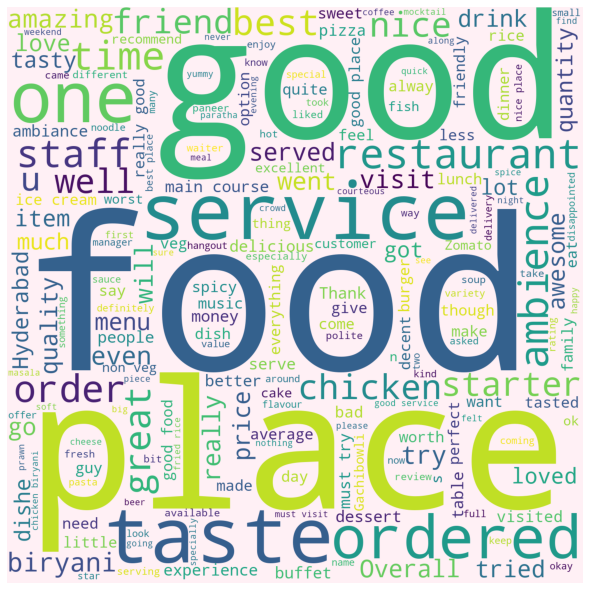

In [ ]:
# Chart - 11 visualization code
from wordcloud import WordCloud, STOPWORDS
Rests = Reviews_df.Review.unique()
rest_string = ' '
for i in Rests:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

##### 1. Why did you pick the specific chart?

The above wordcloud graph was picked to compare highest used words across all reviews

##### 2. What is/are the insight(s) found from the chart?

The words GOOD, FOOD, PLACE, SERVICE, TASTE have been used most while the least used words are POLITE, BAD, AVERAGE and many more, the words in big font have been used most number times while words in small fonts have been used least number of times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the understanding, the words GOOD, FOOD, PLACE, SERVICE, and TASTE have been used most frequently, while the least used words are POLITE, BAD, AVERAGE, and many more, the following insights can be drawn for positive business impact:

Knowing which words are used most frequently can help businesses understand customer preferences and expectations.
A high frequency of words like GOOD, FOOD, PLACE, SERVICE, and TASTE indicates that these are areas that customers consider important, and businesses can focus their efforts on improving these areas to enhance the customer experience.
The frequency of words used can also help businesses understand customer satisfaction levels, with frequent use of positive words indicating high satisfaction levels.
By monitoring the frequency of words used by customers, businesses can make data-driven decisions on where to allocate resources and prioritize efforts to improve customer satisfaction.
Overall, the frequency of words used by customers can provide valuable insights into customer preferences and satisfaction levels, which can help businesses make informed decisions to improve customer experience and increase revenue.

#### Chart - 12 - Correlation Heatmap

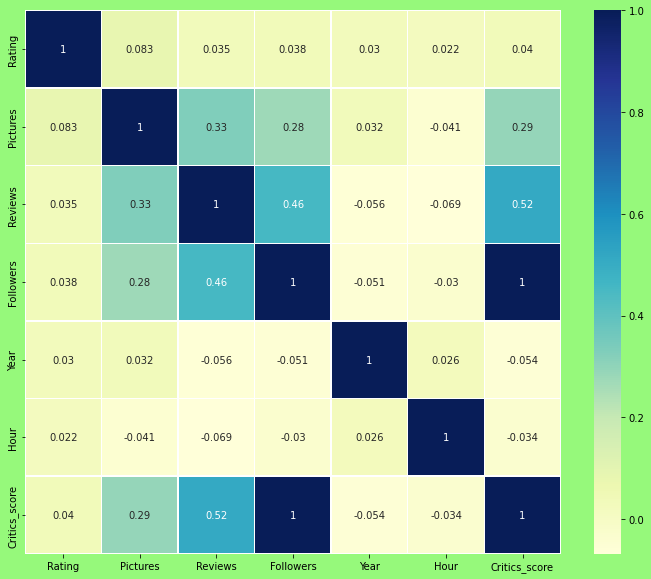

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(Reviews_df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

##### 1. Why did you pick the specific chart?

The above correlation heat map was selected to compare various relation between Rating, Pictures, Reviews, Followers, Year, Hour, Critic Score

##### 2. What is/are the insight(s) found from the chart?

The correlation is between 0-1 critic score and rating is least of 0.04 and highest with followers of 1, hour correlation is least to rating of 0.022, Followers correlate is highest with number of reviews provided of 0.46, reviews correlation is highest with critic score of 0.52, pictures is higher with reviews of 0.33

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
Reviews_df.Review.head()

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
Reviews_df.Review = Reviews_df.Review.str.lower()

#### 3. Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct
     

In [ ]:
Reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Hour,Critics_score
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,3.0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14,5.0
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22,5.0
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,22,2.0
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,21,5.0


In [ ]:
# Remove Punctuations
Reviews_df['Review']= Reviews_df['Review'].apply(remove_punctuation)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words('english')

In [ ]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# let apply the function
Reviews_df['Review']= Reviews_df['Review'].apply(stopwords)

#### 6. Rephrase Text

In [ ]:

from nltk.stem.snowball import SnowballStemmer

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
# let apply the function
Reviews_df['Review']= Reviews_df['Review'].apply(stemming)

In [ ]:
all_words = ' '.join([text for text in Reviews_df['Review']])

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7009),
 ('food', 6492),
 ('place', 6006),
 ('order', 3600),
 ('servic', 3184),
 ('chicken', 3043),
 ('tast', 2964),
 ('time', 2037),
 ('tri', 2031),
 ('ambienc', 1994),
 ('one', 1994),
 ('great', 1939),
 ('visit', 1874),
 ('like', 1813),
 ('realli', 1659),
 ('serv', 1590),
 ('also', 1577),
 ('nice', 1510),
 ('best', 1434),
 ('restaur', 1428)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

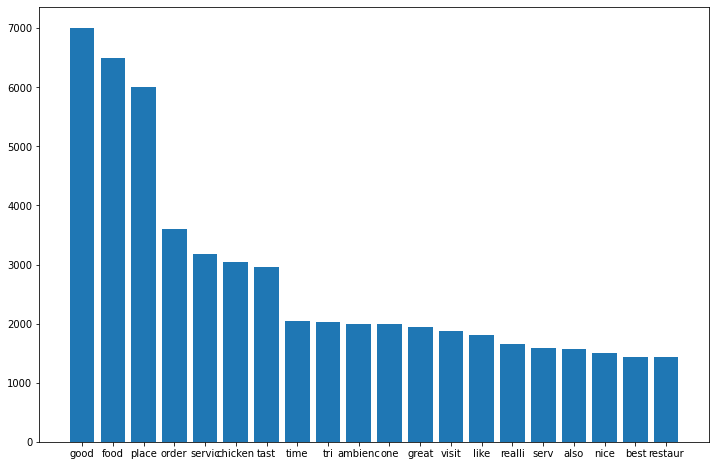

In [ ]:

plt.rcParams['figure.figsize']= (12,8)
plt.bar(x , y)
plt.show()
     

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [ ]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create two new columns
Reviews_df['Subjectivity'] = Reviews_df['Review'].apply(subjectivity)
Reviews_df['Polarity'] = Reviews_df['Review'].apply(polarity)

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:

Reviews_df['Analysis'] = Reviews_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(Reviews_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [ ]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

**The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is**

In [ ]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [ ]:
Reviews_df['Analysis']=Reviews_df['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
Sentiment_df = Reviews_df[['Review','Rating','Analysis']]
Sentiment_df.head()

,Review,Rating,Analysis
0,ambienc good food quit good saturday lunch cos...,5.0,0
1,ambienc good pleasant even servic prompt food ...,5.0,0
2,must tri great food great ambienc thnx servic ...,5.0,0
3,soumen das arun great guy behavior sincereti g...,5.0,0
4,food goodw order kodi drumstick basket mutton ...,5.0,0


In [ ]:
X = Sentiment_df['Review']
y = Sentiment_df['Analysis']
     

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=Sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

In [ ]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)

**Support Vector Machine**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)


In [ ]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test)  
     

In [ ]:
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

--------------------------------------------------
Train accuracy is: 0.9958472873409243
Test accuracy is: 0.9393330654881479
--------------------------------------------------
The confusion matrix on the test data is :
[[2054  138]
 [  13  284]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2192
           1       0.67      0.96      0.79       297

    accuracy                           0.94      2489
   macro avg       0.83      0.95      0.88      2489
weighted avg       0.96      0.94      0.94      2489



**XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [75,100,125],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [75, 100, 125]},
             scoring='recall', verbose=5)

In [ ]:
xgbc_grid.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}

In [ ]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [ ]:
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9959812458137978
Test accuracy is: 0.9513860988348735
--------------------------------------------------
The confusion matrix on the test data is :
[[2023   77]
 [  44  345]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2100
           1       0.82      0.89      0.85       389

    accuracy                           0.95      2489
   macro avg       0.90      0.93      0.91      2489
weighted avg       0.95      0.95      0.95      2489



In [ ]:
Comparision_dict={'Model_Name':['XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.988,0.99],
                  'Test_accuracy':[0.9393,0.9513]} 

In [ ]:
Comparision_df=pd.DataFrame(Comparision_dict)
Comparision_df
     

,Model_Name,Training_accuracy,Test_accuracy
0,XGB,0.988,0.9393
1,Support Vector Machine,0.990,0.9513


**LDA of Reviews**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

document_term_matrix = count_vectorizer.fit_transform(Reviews_df['Review'])

In [ ]:
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -344439.5133084636
LDA model Perplexity on train data 804.6489802551857


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3a98fe1f721bfece4b2fd441745c711d7212ae81672f52fbfeacfff9276bb8f2
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5721f549beb0b7b6b75fe5b01bb78556eb664c309d0f1c6542e7226397ad43ab
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  35.506149
3       51.163364 -159.968018       2        1  22.709428
4      -73.144554   21.523815       3        1  20.116850
0      -66.410133 -110.606438       4        1  12.600345
2       54.417324   12.443444       5        1   9.067228, topic_info=         Term         Freq        Total Category  logprob  loglift
1543     good  6871.000000  6871.000000  Default  30.0000  30.0000
714   chicken  3034.000000  3034.000000  Default  29.0000  29.0000
2484    order  3537.000000  3537.000000  Default  28.0000  28.0000
2676    place  5876.000000  5876.000000  Default  27.0000  27.0000
471   biryani  1354.000000  1354.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1835     item   131.953312   703.864061   Topic5  -5.0895   0.7264
2484    order   168.480435  3537.010120   Topic5  -4.8451  -0.6437
434      best   140.757887  1410.733284   Topic5  -5.0249   0.0957
1400     food   170.770930  6335.317579   Topic5  -4.8316  -1.2131
210   ambienc   142.723829  1947.267998   Topic5  -5.0110  -0.2128

[397 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
55        1  0.962085     255
61        1  0.082140      30
61        2  0.027380      30
61        3  0.876157      30
70        3  0.950996     3bs
...     ...       ...     ...
3952      4  0.914024    wrap
3996      1  0.186462  zomato
3996      2  0.030401  zomato
3996      3  0.713418  zomato
3996      4  0.068910  zomato

[814 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
Restaurant_df.Cuisines = Restaurant_df.Cuisines.str.lower()

In [ ]:
Cluster_df = Restaurant_df.loc[:,['Name','Cost','Cuisines']]

In [ ]:
Cluster_df['Cuisines'] = Cluster_df['Cuisines'].str.replace(' ','')

Cluster_df['Cuisines'] = Cluster_df['Cuisines'].str.split(',')

In [ ]:
#Making one hot encoded labels for each type of cuisines and dropping the cuisine column
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
     

In [ ]:
Cluster_df = Cluster_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(Cluster_df.pop('Cuisines')),
                                                               index=Cluster_df.index, columns=mlb.classes_))

In [ ]:
Cluster_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### 2. Feature Selection

In [ ]:
Reviews_df.Rating.value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
#Creating a new df to get the average ratings for each Restaurant
Rating_df = Reviews_df.groupby(['Restaurant'])['Rating'].mean().reset_index()

In [ ]:
Rating_df .sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [ ]:
Cluster_df = Cluster_df.merge(Rating_df, left_on='Name',right_on='Restaurant')

In [ ]:
Cluster_df.Cost = Cluster_df.Cost.astype(float)

In [ ]:
Cluster_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,1300.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,1200.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


##### Which all features you found important and why?

For Clustering the restaurants we have decided to do clustering based on restaurant cost, rating and cuisines.



### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Cluster_df_sc=sc.fit_transform(Cluster_df.drop(['Name','Restaurant'],axis = 1).values)
Cluster_df_sc

array([[-0.14302616, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378,  1.3413207 ],
       [-0.14302616, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378,  2.17209321],
       [ 0.85021107, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378,  2.09297202],
       ...,
       [ 1.74412457, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378,  1.67758577],
       [-0.93761594, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378, -0.10264103],
       [ 0.25426873, -0.25264558, -0.25264558, ..., -0.14285714,
        -0.10050378,  0.28307477]])

##### Which method have you used to scale you data and why?

We have used Standard scaler technique to scale our data because our data having different features of different scales.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

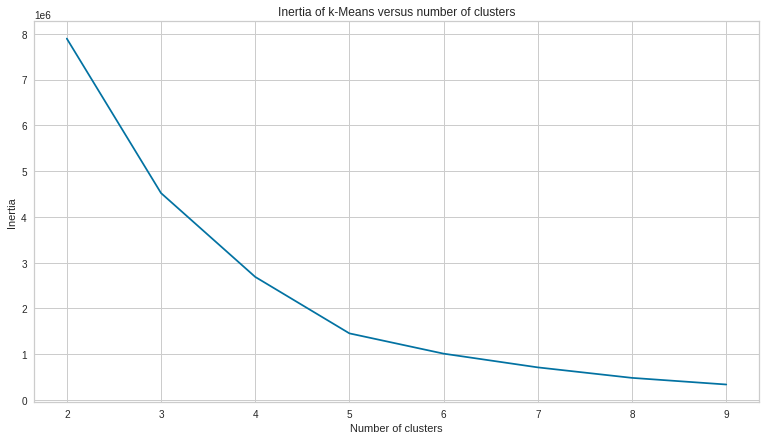

In [ ]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(Cluster_df.drop(['Name','Restaurant'],axis = 1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(Cluster_df.drop(['Name','Restaurant'],axis = 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_lbl = model.predict(Cluster_df.drop(['Name','Restaurant'],axis = 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
Cluster_df['labels'] = cluster_lbl

Text(0.5, 0, 'Cost')

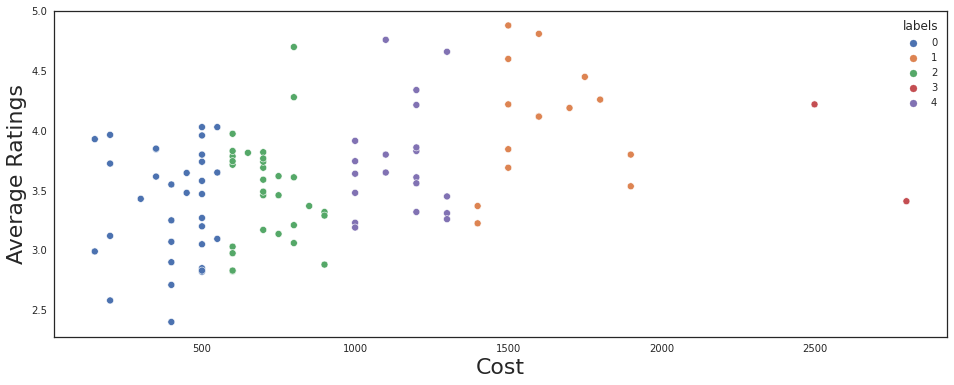

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=Cluster_df,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
X_features=Cluster_df.drop(['Name','Restaurant'],axis = 1).values
scaler_rec=StandardScaler()
X_rec=scaler_rec.fit_transform(X_features)
X=X_rec
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.08933716783687601
For n_clusters = 3, silhouette score is 0.07473960318760463
For n_clusters = 4, silhouette score is 0.06575196576568972
For n_clusters = 5, silhouette score is 0.10410640139009629
For n_clusters = 6, silhouette score is 0.07150599244054635
For n_clusters = 7, silhouette score is 0.08681290809233812
For n_clusters = 8, silhouette score is 0.10725878134811856
For n_clusters = 9, silhouette score is 0.0765139944185958
For n_clusters = 10, silhouette score is 0.1096074622575905
For n_clusters = 11, silhouette score is 0.0867930355531644
For n_clusters = 12, silhouette score is 0.0883099970888452
For n_clusters = 13, silhouette score is 0.09962445032287916


As we can see 5 Cluster have good silhouette score than others. 

### ML Model - 2

Text(0, 0.5, 'Euclidean Distances')

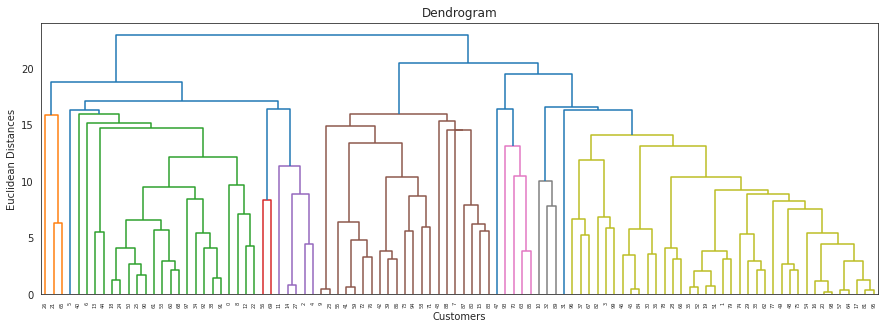

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(Cluster_df_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')


In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Cluster_df_sc)

In [ ]:
Cluster_df['cluster_hr']=y_hc

Text(0.5, 0, 'Cost')

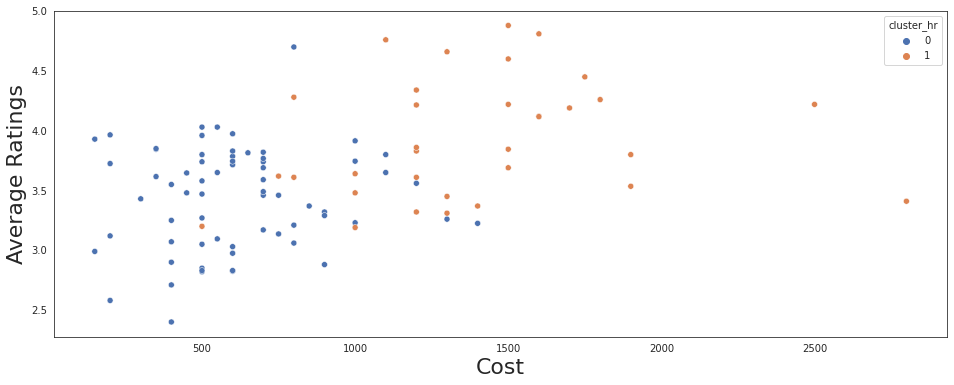

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=Cluster_df,hue='cluster_hr', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

As a result of heirarchial clustering we can see that the restaurants with ratings 4 and below with cost below 1000 are from one cluster and the restaurant cost above 1000 are clustered in second cluster.

### 2. Which ML model did you choose from the above created models as your final Clustering model and why?

For the final clustering model we choose the k-means clustering model because the clusters formed are well seprated based on cost and cuisines than the heirarchial clustering model.

# **Conclusion**



*  We got best cluster as 5 in K-Means
*  We plot polarity and subjectivity plot for sentiment analysis, Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

*   For sentiment analysis we used supervised techniques.
*  We got the best model as SVM (Support Vector Machine) classifier.
 
*   Most of the Reviews are positive.



---









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***